In [1]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 929.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.3-py3-none-any.whl size=190251 sha256=15249a694dc536d58c51f26f554e5fc6ac2e7fb89b2443f31584707723b7071d
  Stored in directory: /root/.cache/pip/wheels/05/f8/db/124d43bec122d6ec0ab3713fadfe25ebed8af52ec561682b4e
Successfully built pyod


In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from pyod.models.knn import KNN
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [21]:
LbEncoder = LabelEncoder()
GBR = GradientBoostingRegressor()
HGBR = HistGradientBoostingRegressor()
RFR = RandomForestRegressor()
ETR = ExtraTreesRegressor()
ADR = AdaBoostRegressor()
modelos = [GBR, HGBR, RFR, ETR, ADR]
model_names = ['GradientBoostingRegressor', 'HistGradientBoostingRegressor', 'RandomForestRegressor', 'ExtraTreesRegressor', 'AdaBoostRegressor']

In [84]:
#Análise Exploratória
def CarregaDados():
  df = pd.read_csv('drive/MyDrive/Carbon/dataset/Carbon Emission.csv')

  drops = ['How Often Shower', 'Heating Energy Source', 'Social Activity', 'How Long TV PC Daily Hour', 'How Long Internet Daily Hour', 'Energy efficiency', 'Cooking_With', 'Recycling']

  df.drop(drops, inplace=True, axis=1)

  df['Sex'] = LbEncoder.fit_transform(df['Sex'])
  df['Transport'] = LbEncoder.fit_transform(df['Transport'])
  df['Vehicle Type'] = LbEncoder.fit_transform(df['Vehicle Type'])
  df['Frequency of Traveling by Air'] = LbEncoder.fit_transform(df['Frequency of Traveling by Air'])
  df['Waste Bag Size'] = LbEncoder.fit_transform(df['Waste Bag Size'])
  df['Body Type'] = LbEncoder.fit_transform(df['Body Type'])
  df['Diet'] = LbEncoder.fit_transform(df['Diet'])

  #indice = Outliers(df)
  #df = df.drop(index=indice)

  previsores = df.drop('CarbonEmission', axis=1)
  y = df['CarbonEmission']

  #correlation = df.corr()
  #plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)

  X_train, X_test, y_train, y_test = train_test_split(previsores, y, test_size=0.10, random_state=42)

  return X_train, X_test, y_train, y_test

In [23]:
def Outliers(dados):
    #Encontra dados outliers através do algoritmo KNN
    detector = KNN()
    detector.fit(dados)

    labels = detector.labels_

    outliers = []

    #Pegando indice dos valores classificados como outlier
    for i in range(len(labels)):
        if labels[i] == 1:
            outliers.append(i)

    return outliers

In [85]:
def Treinamento():
  previsores, _, y, _ = CarregaDados()

  scores = []

  for modelo in tqdm(modelos):
    modelo.fit(previsores, y)

  for modelo in tqdm(modelos):
    score = cross_val_score(modelo, previsores, y, cv=10)
    scores.append(score)



  i = 0
  for score in scores:
    plt.plot(score)
    plt.title(model_names[i]+'\nMédia:'+str(score.mean())+'\nDesvio Padrão:'+str(score.std()))
    plt.xlabel('CV')
    plt.ylabel('Score')
    plt.show()
    i = i+1


In [81]:
def Previsao():
  _, previsores_test, _, y_test = CarregaDados()

  predicts = []
  for modelo in tqdm(modelos):
    predicts.append(modelo.predict(previsores_test))

  y = pd.DataFrame(y_test)

  i = 0
  for predict in tqdm(predicts):
    y[model_names[i]] = predict
    i = i+1

  y.reset_index(inplace=True)
  y.drop('index', axis=1, inplace=True)
  display(y)

  plt.figure(figsize=(32,8))
  #sn.scatterplot(y)
  plt.plot(y)
  plt.legend(('Carbon Emission','GradientBoostingRegressor', 'HistGradientBoostingRegressor', 'RandomForestRegressor', 'ExtraTreesRegressor', 'AdaBoostRegressor'))


100%|██████████| 5/5 [01:25<00:00, 17.10s/it]


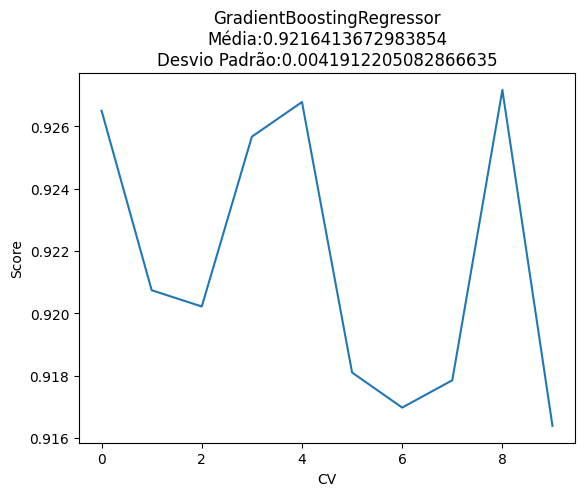

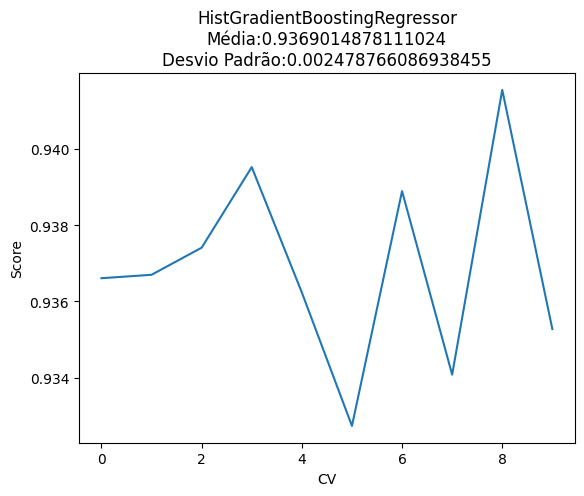

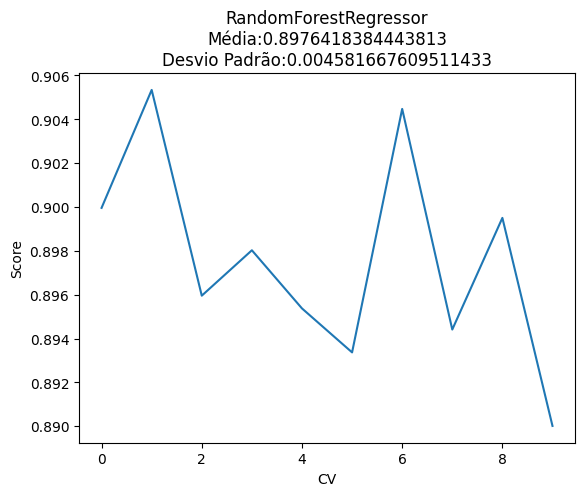

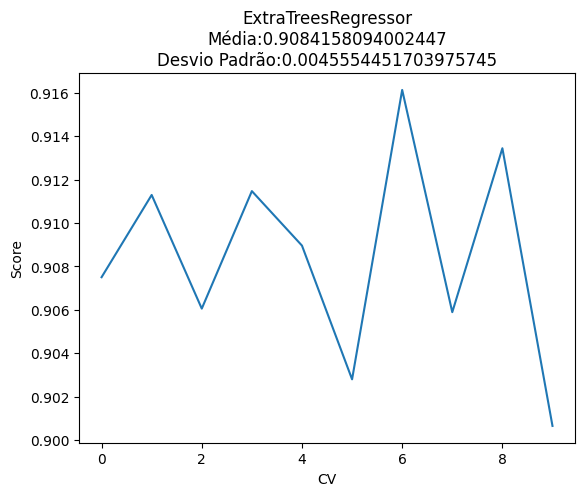

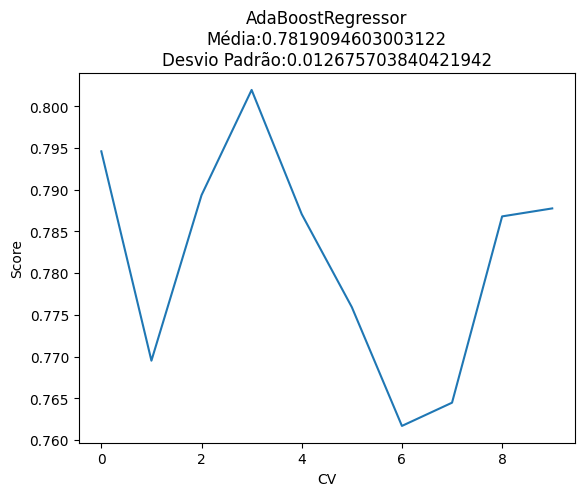

In [86]:
Treinamento()

100%|██████████| 5/5 [00:00<00:00, 1553.33it/s]


,CarbonEmission,GradientBoostingRegressor,HistGradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor
0,978,1262.066677,1235.190373,1356.70,1306.27,1618.862109
1,1608,1767.024207,1782.973107,1914.74,1835.23,2226.202541
2,2236,2167.279099,1962.169414,1893.47,2154.81,2606.158704
3,2834,2953.483761,2892.091216,2865.84,2682.09,3006.037383
4,2591,2323.499985,2341.322896,2332.42,2263.95,2799.463748
...,...,...,...,...,...,...
995,2462,2386.182695,2414.065590,2434.23,2232.54,2776.714607
996,3601,3691.940404,3589.562739,4184.37,3931.43,4216.677237
997,3127,3102.720008,3100.131762,3023.94,3089.52,2831.577491
998,1406,1706.272862,1673.454360,1833.57,1701.96,1874.153921


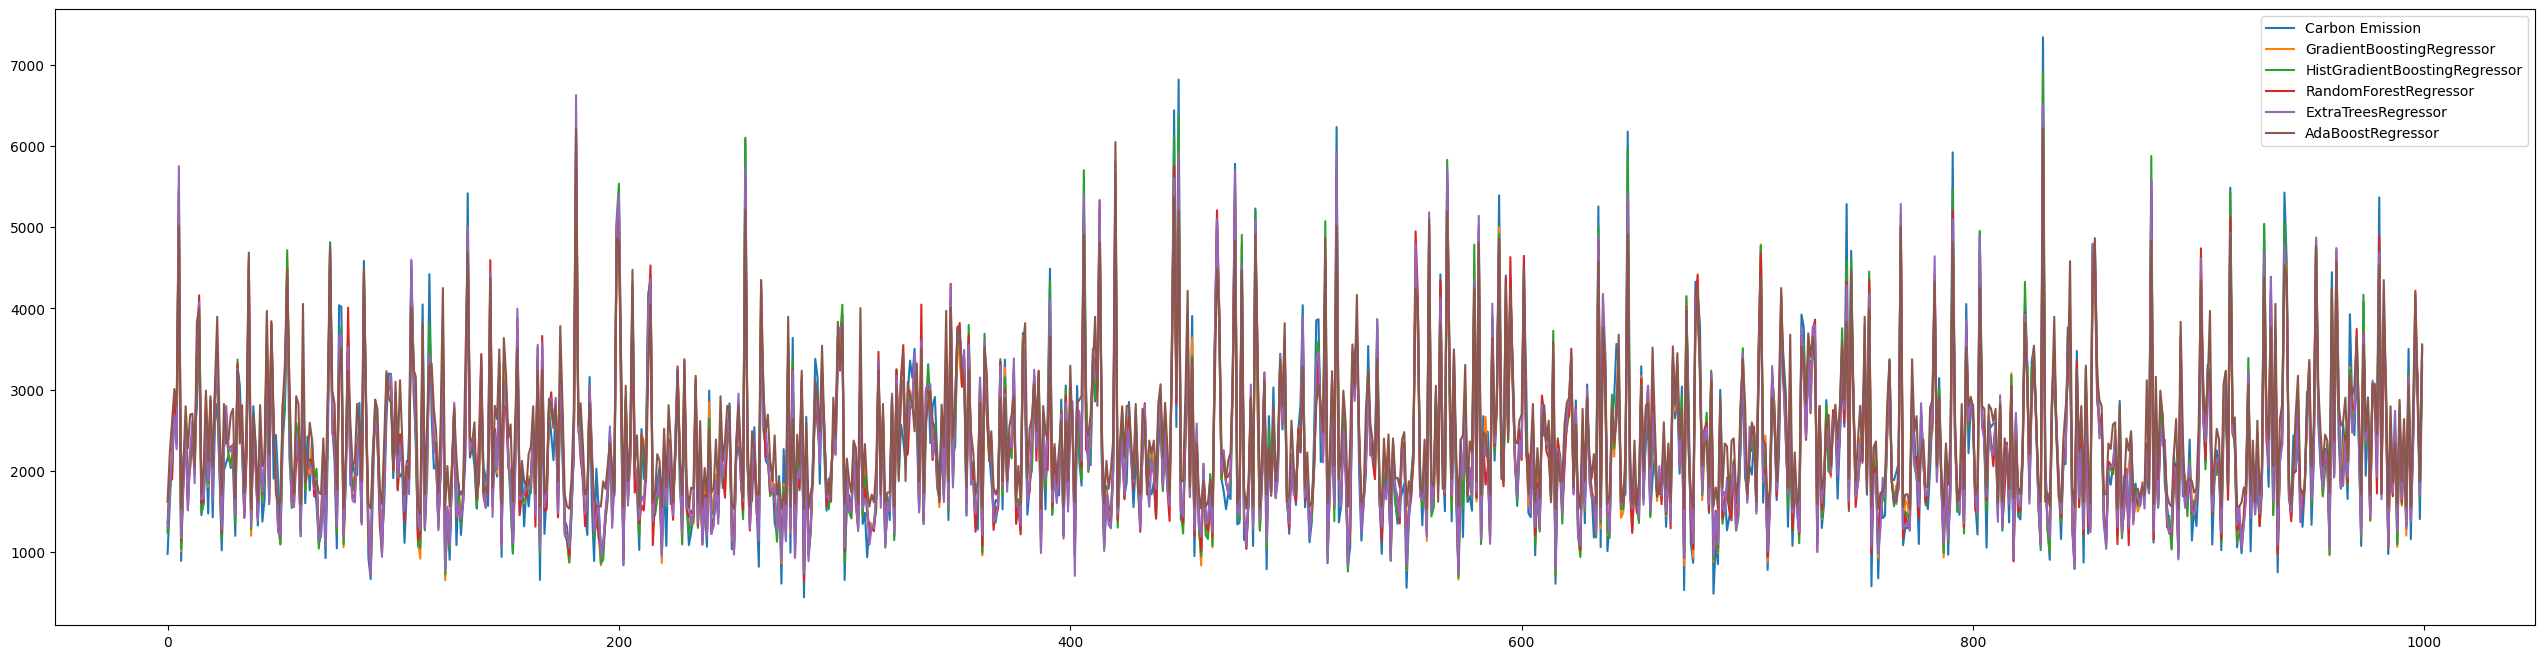

In [88]:
Previsao()